# Visualizations using CSV

Take the all_cornell.csv (created by datareader.py) and do stuff with it I guess

In [11]:
import json
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy

<h1> Let's load in our survey data! </h1>

In [12]:
all_data = pd.read_csv('all_cornell.csv')
all_data

,username,id,title,artist,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,6cjzkudbvmwfe963clvemzwkj,3N0gL4EypJfzJ6txDnIrDS,I Know Where The Rainbow has Fallen,JANNABI,False,43,0.456,0.660,-5.480,0.0280,0.4440,0.000094,0.1120,0.246,144.014
1,6cjzkudbvmwfe963clvemzwkj,2d87kHwM5YByBhsU8qCDWg,land of night,JANNABI,False,32,0.347,0.482,-8.947,0.0306,0.8420,0.048400,0.2110,0.109,147.900
2,6cjzkudbvmwfe963clvemzwkj,2XdyebP7KxClMOse2C5iyA,Your Dog Loves You,"Colde, Crush",False,2,0.667,0.233,-11.862,0.0302,0.9280,0.000027,0.1540,0.131,101.865
3,6cjzkudbvmwfe963clvemzwkj,2BkpDA0AyGPHzyae6wWtZW,Sigh (Feat. GIRIBOY),"BIG Naughty, GIRIBOY",False,40,0.697,0.437,-7.731,0.0491,0.6740,0.000000,0.0778,0.326,119.724
4,6cjzkudbvmwfe963clvemzwkj,0BFtp5qYodX3PCaSwYPa0G,NAPPA 나빠,Crush,False,0,0.561,0.542,-7.947,0.2580,0.3940,0.000000,0.1730,0.536,161.867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48637,kaybae.,7Lbxvt42JsNSKVCaN63qhD,Wonderful Christmastime [Edited Version] - Rem...,Paul McCartney,False,26,0.774,0.511,-8.914,0.0319,0.3220,0.000000,0.0672,0.771,94.736
48638,kaybae.,6tjituizSxwSmBB5vtgHZE,Holly Jolly Christmas,Michael Bublé,False,47,0.647,0.465,-8.308,0.0428,0.8650,0.000000,0.0882,0.699,151.251
48639,kaybae.,3hK0tQgnfjXwaCd0oHV0u2,K For Christmas,Lil Mosey,True,38,0.707,0.530,-9.471,0.0789,0.2340,0.004400,0.1120,0.471,189.008
48640,kaybae.,1ADjWm8QNhgNV8yCNNgQ1T,Santa Tell Me,Ariana Grande,False,0,0.464,0.630,-7.337,0.1820,0.0464,0.000000,0.2950,0.527,132.960


In [13]:
#Ex. sort by username
someones_data = all_data[all_data['username'] == 'ejlity']

someones_data2 = all_data[all_data['username'] == 'kaybae.']

someones_data.head()

,username,id,title,artist,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
1903,ejlity,4Pa5XXpn3sdBPMVCSWGEhB,Walkway Blues (feat. J Laser),"M83, J. Laser",False,40,0.543,0.615,-7.071,0.0386,0.00995,0.143000,0.0910,0.311,149.906
1904,ejlity,5e9TFTbltYBg2xThimr0rU,The Chain - 2004 Remaster,Fleetwood Mac,False,83,0.545,0.670,-8.810,0.0496,0.00900,0.000822,0.0451,0.481,151.553
1905,ejlity,5VGlqQANWDKJFl0MBG3sg2,Use Somebody,Kings of Leon,False,78,0.276,0.715,-5.356,0.0432,0.00552,0.000417,0.2010,0.173,137.028
1906,ejlity,6Yzh272O4hwZHjrnXYhL8a,"Do It, Try It",M83,False,46,0.580,0.707,-7.355,0.0363,0.01870,0.014000,0.0340,0.156,116.949
1907,ejlity,6lpmMYLD6EyDASjLzpGnTE,Emotions,Q,False,0,0.364,0.164,-12.582,0.0415,0.80700,0.000003,0.1700,0.282,77.072


In [14]:
# Ex. get averages from one username

features = ['popularity','danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

feature_averages = []

for feature in features:
        avg =  someones_data[feature].mean()
        feature_averages.append(avg)

feature_averages

[28.696165191740413,
 0.4435672566371682,
 0.4088219174041298,
 -13.863026548672567,
 0.08090235988200589,
 0.5515570834808263,
 0.38394290604719755,
 0.1759041297935102,
 0.3402000000000003,
 108.68595870206484]

<h1> Aggregating student song feature averages </h1>

In [15]:
profile_avg = all_data.groupby(['username']).mean()
profile_avg

,explicit,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
username,,,,,,,,,,,
12124545665,0.345238,54.890476,0.589926,0.668986,-6.926631,0.097232,0.204626,0.119353,0.194654,0.452749,125.758543
12139305999,0.188544,53.829952,0.551808,0.597089,-9.054987,0.069966,0.292792,0.191677,0.183472,0.439477,120.373329
1283949946,0.050328,49.829322,0.542713,0.468726,-10.749884,0.046285,0.476762,0.073601,0.175743,0.541245,114.999527
1re58jm2ppu8vkex6p2lqkyvt,0.230035,57.587674,0.589655,0.651818,-7.151919,0.096203,0.243743,0.048491,0.200294,0.513539,125.497831
31m3onadeh4wxucgckv3fhcyeoqu,0.763889,64.534722,0.679556,0.604200,-7.149861,0.163600,0.240491,0.053422,0.217819,0.427974,119.839444
31tczmefxwht47ndcx5rnqqztaaa,0.247100,38.086234,0.611339,0.529676,-8.395823,0.079979,0.395218,0.094762,0.167790,0.411883,119.498244
6cjzkudbvmwfe963clvemzwkj,0.057143,32.426190,0.521957,0.383977,-11.013333,0.079403,0.673316,0.236511,0.166016,0.356932,110.786262
aaa9rnpre89bf2i0tx7ihyem0,0.059488,45.621654,0.605338,0.566542,-8.596186,0.081538,0.429531,0.230805,0.166541,0.451694,121.980213
alayna.earl,0.587879,61.587879,0.691400,0.537164,-7.790182,0.140721,0.327028,0.031153,0.181086,0.488265,119.636558


<h1> Now, combine with demographic data... </h1>

In [16]:
demographic_data = pd.read_csv('all_cornell_demographics_042623.csv')

In [17]:
merged_data = pd.merge(demographic_data, profile_avg, on='username')
merged_data.head()

,index,Progress,Finished,Q1,Q2,Q3,Q4,Q7,Q5,Q6,...,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,3,100,True,(AS) College of Arts and Sciences,Computer Science,"Undergraduate, 1st year (2026)",Male,Other club/team,International,Korea South,...,32.426190,0.521957,0.383977,-11.013333,0.079403,0.673316,0.236511,0.166016,0.356932,110.786262
1,4,100,True,(AS) College of Arts and Sciences,Government,"Undergraduate, 1st year (2026)",Female,Professional club,International,Indonesia,...,61.897436,0.692436,0.809462,-5.094949,0.182456,0.071144,0.001701,0.256131,0.606026,132.294077
2,7,100,True,(ENG) College of Engineering,Cognitive Science,"Undergraduate, 1st year (2026)",Male,"Project team,Other club/team",Domestic,NaN,...,60.553468,0.684918,0.608226,-7.085861,0.133515,0.240063,0.027794,0.186895,0.450523,125.001205
3,8,100,True,(ILR) School of Industrial and Labor Relations,Industrial and Labor Relations,"Undergraduate, 3rd year (2024)",Female,"Professional club,Other club/team",Domestic,NaN,...,50.416223,0.536599,0.653404,-7.529116,0.059465,0.246162,0.099010,0.202441,0.533323,123.367908
4,9,100,True,(ENG) College of Engineering,Computer Science,"Undergraduate, 4th year (2023)",Male,Project team,Domestic,NaN,...,28.696165,0.443567,0.408822,-13.863027,0.080902,0.551557,0.383943,0.175904,0.340200,108.685959


<h1> Stats across colleges! </h1>

In [18]:
# first, i'm curious how many of each school we have
colleges = ['(AS) College of Arts and Sciences','(ENG) College of Engineering',\
            '(CALS) College of Agriculture and Life Sciences','(AAP) College of Architecture, Art and Planning',\
            '(ILR) School of Industrial and Labor Relations',\
            '(HUMEC) College of Human Ecology', '(DYSON) Dyson School of Applied Economics and Management']

for college in colleges:
    print(college+ " respondents: " + str(merged_data['Q1'].value_counts()[college]))

(AS) College of Arts and Sciences respondents: 13
(ENG) College of Engineering respondents: 12
(CALS) College of Agriculture and Life Sciences respondents: 9
(AAP) College of Architecture, Art and Planning respondents: 2
(ILR) School of Industrial and Labor Relations respondents: 5
(HUMEC) College of Human Ecology respondents: 1
(DYSON) Dyson School of Applied Economics and Management respondents: 1


In [19]:
# loop over the colleges and song features to populate the dataframe
mean_list = []

for college in colleges:
    college_data = merged_data[merged_data['Q1'] == college]
    for song_feature in features:
        mean = college_data[song_feature].mean()
        mean_list.append({'college': college, 'song_feature': song_feature, 'mean': mean})

mean_df = pd.DataFrame(mean_list)

# Pivot the dataframe
mean_df = pd.pivot(mean_df, index='song_feature', columns='college', values='mean')

# Print the pivoted dataframe
mean_df

college,"(AAP) College of Architecture, Art and Planning",(AS) College of Arts and Sciences,(CALS) College of Agriculture and Life Sciences,(DYSON) Dyson School of Applied Economics and Management,(ENG) College of Engineering,(HUMEC) College of Human Ecology,(ILR) School of Industrial and Labor Relations
song_feature,,,,,,,
acousticness,0.415357,0.363877,0.311989,0.229984,0.276414,0.292792,0.245075
danceability,0.538727,0.596679,0.612345,0.676559,0.613946,0.551808,0.627032
energy,0.519932,0.570778,0.580084,0.639099,0.603533,0.597089,0.640540
instrumentalness,0.160628,0.105731,0.095717,0.019393,0.087710,0.191677,0.065725
liveness,0.175844,0.178494,0.176770,0.186230,0.186605,0.183472,0.182006
loudness,-10.454558,-8.299035,-8.353172,-6.551804,-8.096073,-9.054987,-6.913330
popularity,32.699277,45.519788,51.468214,64.441265,51.470307,53.829952,56.690209
speechiness,0.060748,0.086202,0.101549,0.123565,0.111220,0.069966,0.087016
tempo,118.235584,119.824858,120.220899,122.732476,120.172890,120.373329,118.512729


<h3> a visualization (scroll) </h3>

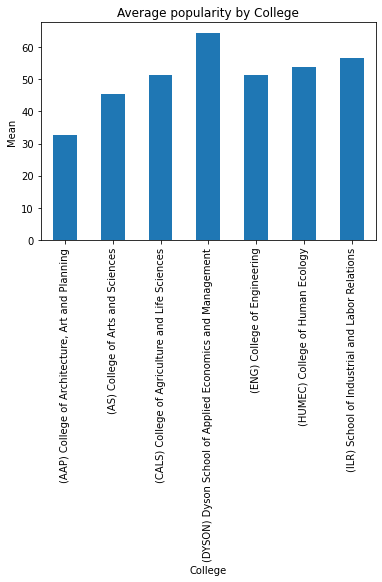

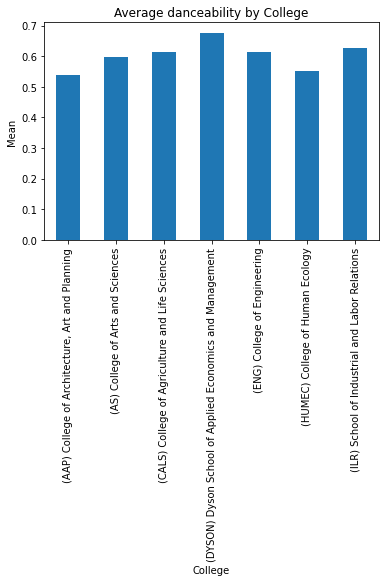

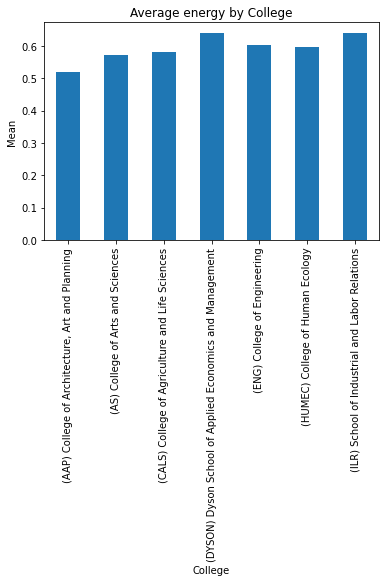

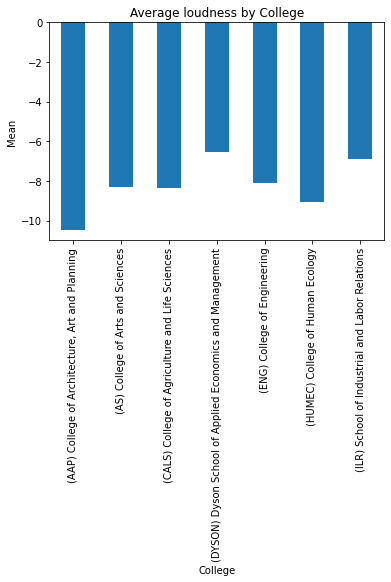

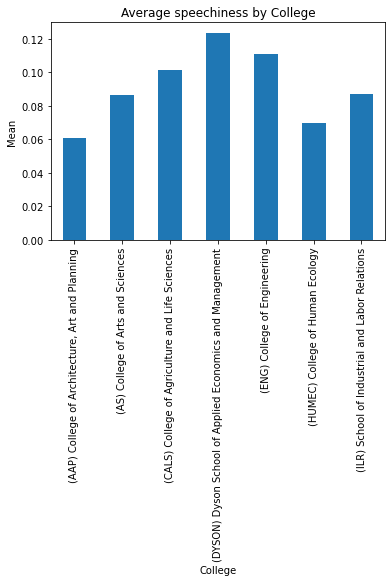

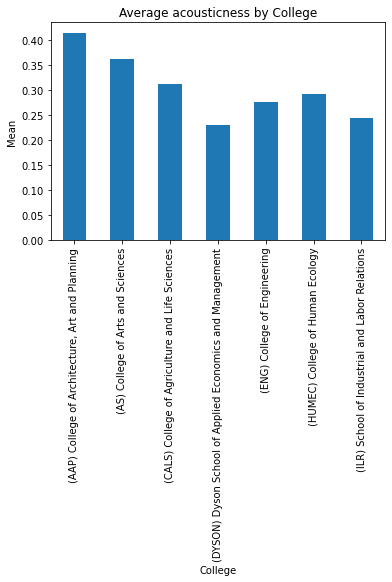

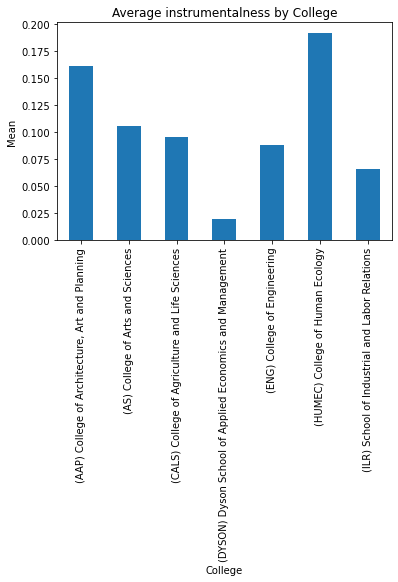

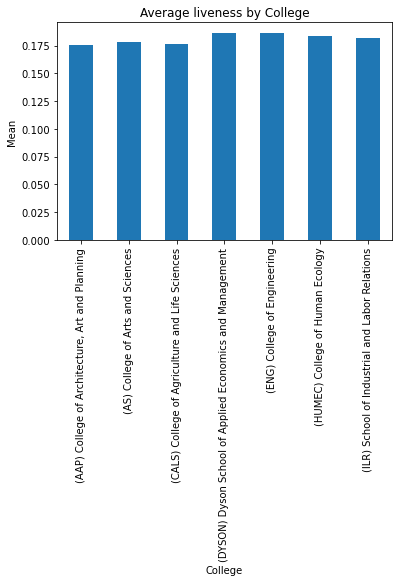

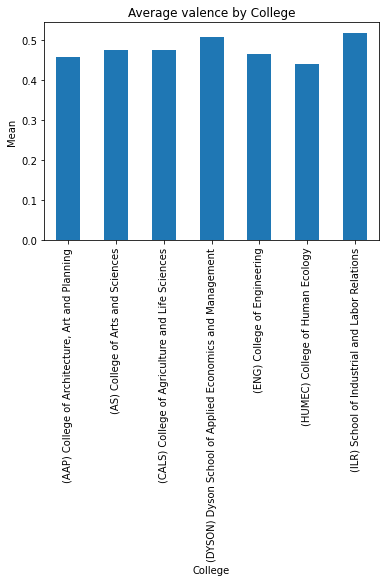

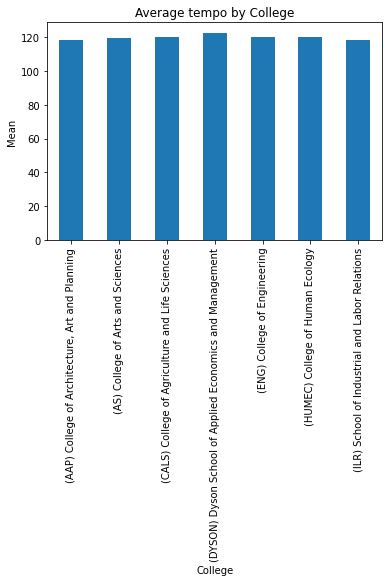

In [20]:
for feature in features:
    feature_df = mean_df.loc[feature]
    feature_df.plot(kind='bar')
    plt.xlabel('College')
    plt.ylabel('Mean')
    plt.title('Average '+ feature + ' by College')
    plt.show()

<h2> Let's compare high vs. low energy students! </h2>

In [21]:
# dataframes of self-reported energy levels
low_energy = merged_data[merged_data['Q8_1']<= 5]
high_energy = merged_data[merged_data['Q8_1'] > 5 ]

print('Number of low energy respondents: ' + str(len(low_energy)))
print('Number of high energy respondents: ' + str(len(high_energy)))

print('Average song energy of low energy respondents: '+ str(low_energy['energy'].mean()))
print('Average song energy of high energy respondents: '+ str(high_energy['energy'].mean()))

Number of low energy respondents: 21
Number of high energy respondents: 22
Average song energy of low energy respondents: 0.5695291906036931
Average song energy of high energy respondents: 0.609176968347628


<h2> What about pessimistic vs. optimistic students? </h2>

In [22]:
# dataframes of self-reported energy levels
pessimistic = merged_data[merged_data['Q8_2'] <= 5]
optimistic = merged_data[merged_data['Q8_2'] > 5 ]

print('Number of pessimistic respondents: ' + str(len(pessimistic)))
print('Number of optimistic respondents: ' + str(len(optimistic)))

print('Average song valence of pessimistic respondents: '+ str(pessimistic['valence'].mean()))
print('Average song valence of optimistic respondents: '+ str(optimistic['valence'].mean()))

Number of pessimistic respondents: 18
Number of optimistic respondents: 25
Average song valence of pessimistic respondents: 0.47281718992397553
Average song valence of optimistic respondents: 0.4787360477719169


<h1> Stats across school years! </h1>

In [23]:
grades = ['Undergraduate, 1st year (2026)', 'Undergraduate, 2nd year (2025)', 'Undergraduate, 3rd year (2024)',\
         'Undergraduate, 4th year (2023)', 'Graduate student']

for grade in grades:
    print(grade+ " respondents: " + str(merged_data['Q3'].value_counts()[grade]))
    
grade_mean_list = []

for grade in grades:
    grade_data = merged_data[merged_data['Q3'] == grade]
    for song_feature in features:
        grade_mean = grade_data[song_feature].mean()
        grade_mean_list.append({'grade': grade, 'song_feature': song_feature, 'mean': grade_mean})

grade_mean_df = pd.DataFrame(grade_mean_list)

grade_mean_df = pd.pivot(grade_mean_df, index='song_feature', columns='grade', values='mean')
grade_mean_df

Undergraduate, 1st year (2026) respondents: 8
Undergraduate, 2nd year (2025) respondents: 14
Undergraduate, 3rd year (2024) respondents: 12
Undergraduate, 4th year (2023) respondents: 5
Graduate student respondents: 3


grade,Graduate student,"Undergraduate, 1st year (2026)","Undergraduate, 2nd year (2025)","Undergraduate, 3rd year (2024)","Undergraduate, 4th year (2023)"
song_feature,,,,,
acousticness,0.432430,0.293973,0.309286,0.277266,0.366975
danceability,0.544598,0.595815,0.616462,0.619270,0.601800
energy,0.522676,0.622506,0.586202,0.611355,0.527842
instrumentalness,0.189893,0.094510,0.087426,0.069606,0.122131
liveness,0.169837,0.192741,0.177591,0.182186,0.175532
loudness,-10.244013,-7.594686,-8.290587,-7.433892,-9.391820
popularity,41.665127,48.594588,50.568590,53.644640,46.951412
speechiness,0.058736,0.103602,0.099942,0.091499,0.106898
tempo,118.617170,122.188573,119.450291,120.139655,117.210147


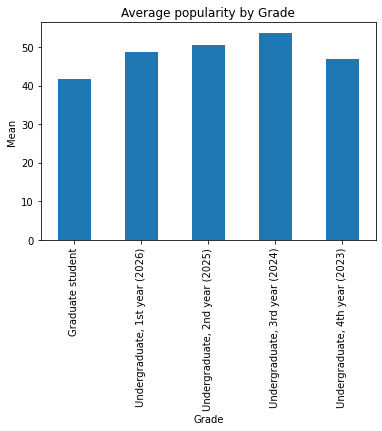

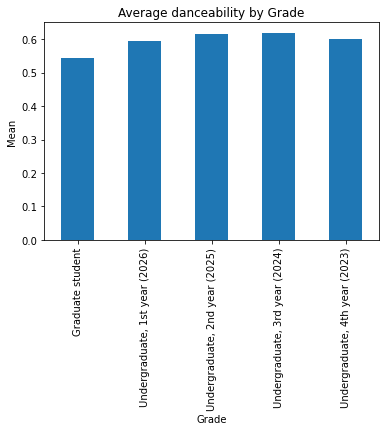

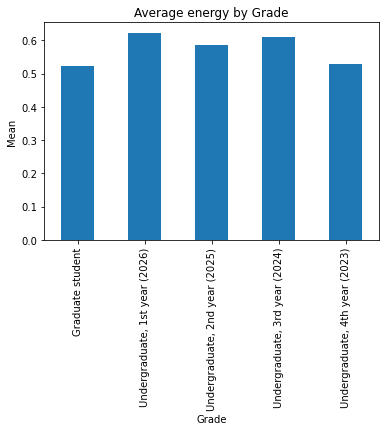

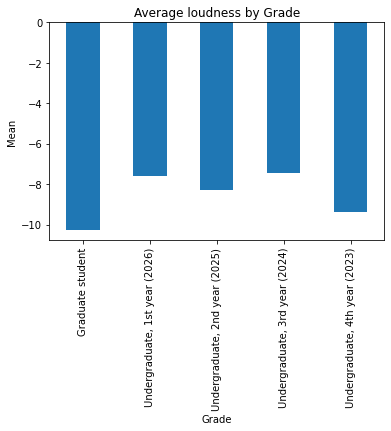

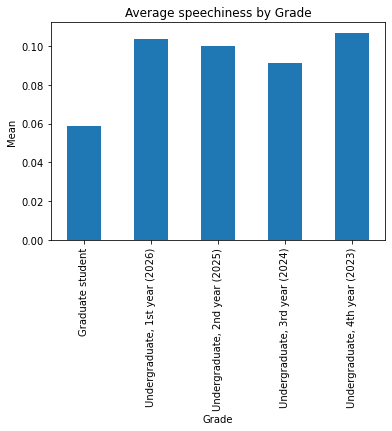

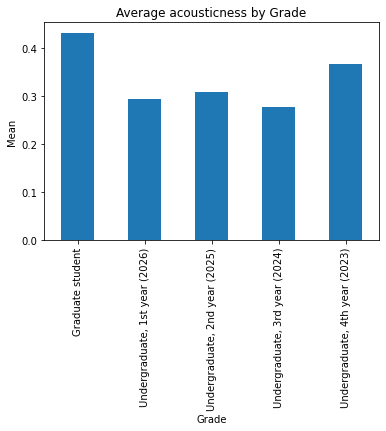

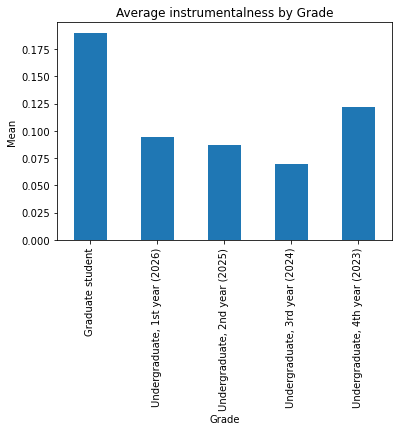

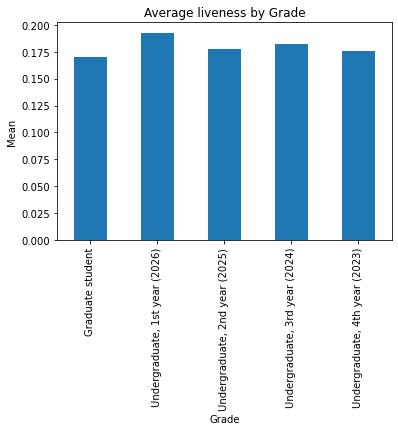

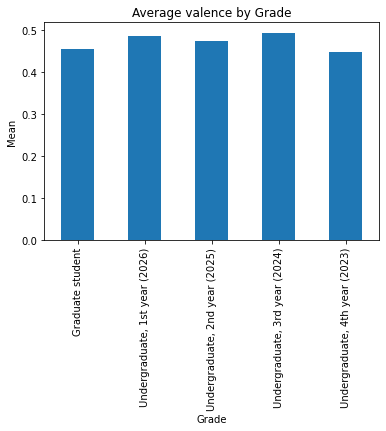

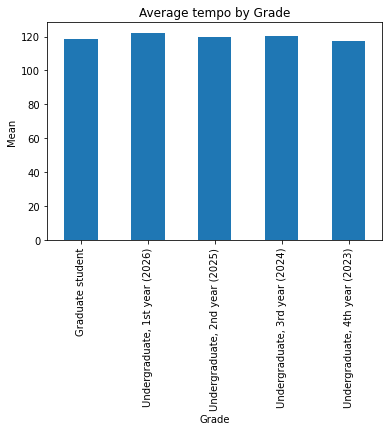

In [24]:
for feature in features:
    feature_df = grade_mean_df.loc[feature]
    feature_df.plot(kind='bar')
    plt.xlabel('Grade')
    plt.ylabel('Mean')
    plt.title('Average '+ feature + ' by Grade')
    plt.show()